In [219]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from functools import reduce
import seaborn as sns
from sklearn import preprocessing

In [220]:
# getting data
happiness_data = pd.read_csv("./datasets/world_happiness_2017.csv")
human_development_data = pd.read_csv("./datasets/hdi_2017.csv")
corruption_data = pd.read_csv("./datasets/corruption_ratings_2018.csv")
co2_emissions_data = pd.read_csv("./datasets/co2_emissions_2014.csv")
gdp_cap_data = pd.read_csv("./datasets/gdp_cap_ppp_2017.csv")

<h4>Goal:</h4>

Find what metrics best predict a country's happiness. There’s a dataset from a [Gallup World Poll](https://www.kaggle.com/unsdsn/world-happiness#2017.csv) showing self-reported happiness in over 150 countries, and I want to find what metrics, for example HDI data, CO2 emissions, etc. best predict the country's happiness.

<h4>Data preprocessing:</h4>

One thing I had to consider was each dataset could have different names for different countries. For example, Russia was called "Russian Federation" in the human development dataset, but was simply called "Russia" in the world happiness dataset. So, I had to find which countries had different names and manually match their names in all the datasets. <br><br>
The method I used for this was basically the opposite of the code two cells below, where I found common countries in all datasets: I found what countries were NOT common across all datasets and checked if any of these countries were the same, just with different names, and changed those country names across all datasets so they matched.

In [221]:
print("Examples of the data that'll be used: \n")
print(happiness_data[["Country", "Happiness_Score"]].head())
print("\n")
print(corruption_data[["Country", "Corruption_Score"]].head())

Examples of the data that'll be used: 

       Country  Happiness_Score
0       Norway            7.537
1      Denmark            7.522
2      Iceland            7.504
3  Switzerland            7.494
4      Finland            7.469


       Country  Corruption_Score
0      Denmark                88
1  New Zealand                87
2      Finland                85
3    Singapore                85
4       Sweden                85


Below, I'm finding countries that are in all the datasets, since I'll only be using those countries for the project. I used an opposite method of this to find what countries had different names across datasets (i.e. "Russia" vs "Russian Federation") so I could match them

In [222]:
# countries that are in all the datasets
common_countries = list(reduce(set.intersection, map(set, [happiness_data.Country, human_development_data.Country, 
                                            corruption_data.Country, co2_emissions_data.Country, gdp_cap_data.Country 
                                           ])))

print(len(common_countries)) # 149 countries that in all datasets (after data preprocessing)

149


In [223]:
# merging all the necessary data from all datasets into one dataframe
d = []

# going through the common countries 
for country in common_countries:    

    #grabbing their data from each dataset
    country_dict = {
        "country": country, 
        "happiness": happiness_data.at[
            happiness_data.index[happiness_data['Country'] == country].tolist()[0], "Happiness_Score"],
        "corruption": corruption_data.at[
            corruption_data.index[corruption_data['Country'] == country].tolist()[0], "Corruption_Score"],
        "human_development": human_development_data.at[
            human_development_data.index[human_development_data['Country'] == country].tolist()[0], "HDI_Score"],
        "co2_emissions": co2_emissions_data.at[
            co2_emissions_data.index[co2_emissions_data['Country'] == country].tolist()[0], "CO2_Emissions"],
        "gdp_cap_ppp": gdp_cap_data.at[
            gdp_cap_data.index[gdp_cap_data['Country'] == country].tolist()[0], "GDP_CAP_PPP"],
    }
    # adding that country and its data to the list
    d.append(country_dict)

# creating a dataframe from the dictionary
data = pd.DataFrame(d)

# changing column order
data = data[['country', 'happiness', 'corruption', 'co2_emissions', 'human_development', "gdp_cap_ppp"]]
data = data.sort_values(by=['happiness'], ascending=False) # ordering dataframe so happiest countries are at the top
data.head()

,country,happiness,corruption,co2_emissions,human_development,gdp_cap_ppp
31,Norway,7.537,84,9.270945,0.953,61414.281370
138,Denmark,7.522,88,5.935712,0.929,51364.144700
124,Iceland,7.504,76,6.059657,0.935,53152.698894
114,Switzerland,7.494,85,4.311563,0.944,64712.127503
33,Finland,7.469,85,8.660721,0.920,44865.840913


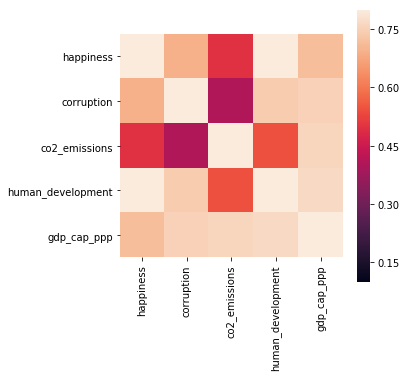

In [224]:
# making a correlation heatmap for all datapoints
corrmat = data.corr()
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(corrmat, robust = True, vmax=.8, vmin = .1, square=True);

In [226]:
#normalized_X = preprocessing.normalize([data.loc[:, data.columns != 'country']])